In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from skimage.feature import graycomatrix, graycoprops
from image_extractor import init_lut,apply_lut, hsv_filter, statistic_analysis, geometry_analysis, linear_fn, curved, seperate_chanel, preprocess_hsv, histogram_analysis

# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (35).JPG'
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Brittle/image (35).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (23).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (97).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_PartiallyPurple/image (2).JPG'

# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Moldered/image (67).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Slaty/image (56).JPG'


plt.rcParams['figure.dpi'] = 102

image  = cv2.imread(image_dir)
# image2 = cv2.imread(image2_dir)
# im_shape = np.shape(image)
lut1 = init_lut(fn=linear_fn, coefficient=10)
lut2 = init_lut(fn=curved, coefficient=1.5)

((276.326171875, 264.5602722167969), (96.36743927001953, 325.3461608886719), 170.8767547607422)


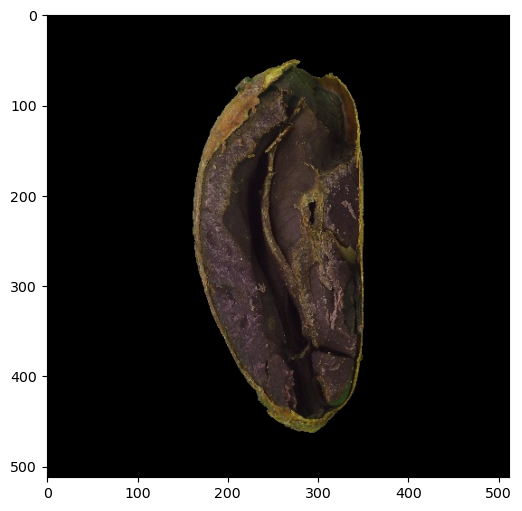

In [17]:
plt.rcParams["figure.figsize"] = (6,6)
image_hsv, cnt, ellipse = preprocess_hsv(image, Contour=True)
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
origin_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(ellipse)

plt.imshow(origin_rgb)
plt.show()

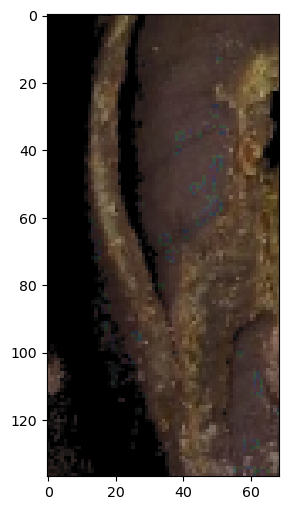

In [14]:
hei, wid, c = np.shape(image_rgb)
box = image_rgb[int(hei/3):int(2*hei/3), int(wid/3):int(2*wid/3),:]
plt.imshow(box)
plt.show()

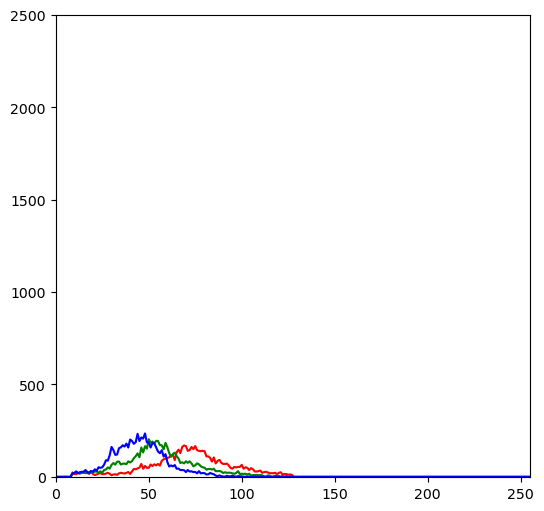

In [15]:
his = histogram_analysis(box, True)

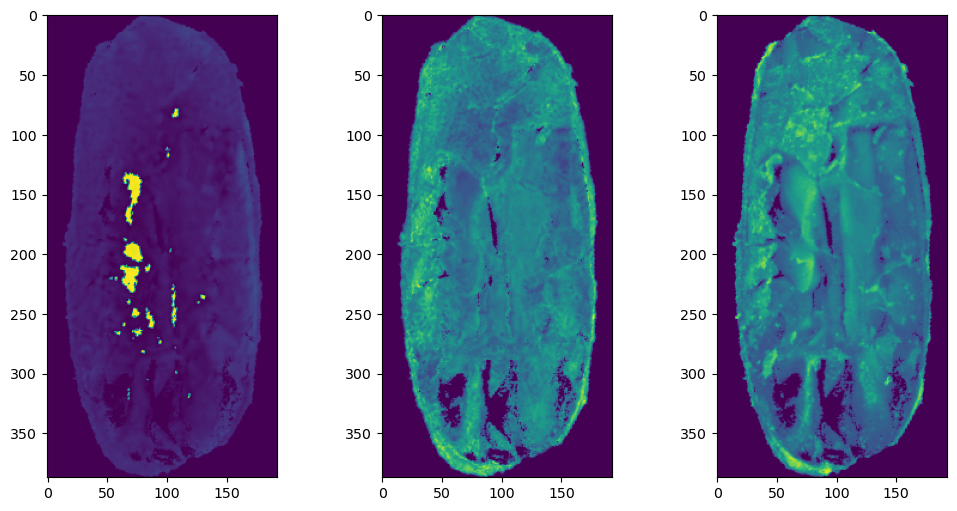

In [18]:
plt.rcParams["figure.figsize"] = (12,6)
h,s,v = seperate_chanel(image_hsv, plot=True)

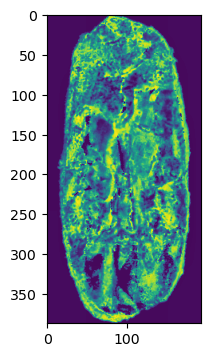

In [47]:
clahe = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(8,8))
clahe_s = clahe.apply(s)
plt.imshow(clahe_s)
plt.show()

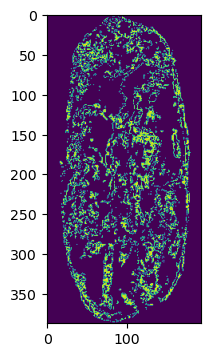

In [51]:
plt.rcParams["figure.figsize"] = (4,4)

ret, ths = cv2.threshold(clahe_s, 156, 255, cv2.THRESH_TOZERO)
ret, ths2 = cv2.threshold(ths, 200, 255, cv2.THRESH_TOZERO_INV)

plt.imshow(ths2)
plt.show()

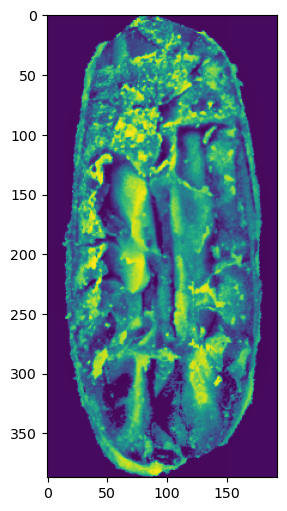

In [20]:
plt.rcParams["figure.figsize"] = (6,6)
# v = CLAHE(v, grey=True)
clahe = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(8,8))
v = clahe.apply(v)

plt.imshow(v)
plt.show()

In [21]:
plt.rcParams["figure.figsize"] = (6,6)
level = 32
bins = np.linspace(0, 255+1, level+1)
digitize = np.digitize(v, bins) - 1

In [23]:
# plt.rcParams["figure.figsize"] = (6,6)
# ctH, ctV = hsv_contour_extract(image_hsv)
# print(np.shape(ctH))
# for cnt in ctH:
#     cv2.drawContours(origin_rgb, [cnt], -1, (0, 255, 255), 1)
#     (x,y,w,h) = cv2.boundingRect(cnt)
#     cv2.rectangle(origin_rgb,(x,y),(x+w, y+h),(0,255,255), 1)
#     # print(geometry_analysis(cnt))
#     # print(statistic_analysis(origin_rgb[y:y+h,x:x+w]))

# for cnt in ctV:
#     cv2.drawContours(origin_rgb, [cnt], -1, (255, 0, 255), 1)
#     (x,y,w,h) = cv2.boundingRect(cnt)
#     cv2.rectangle(origin_rgb,(x,y),(x+w, y+h),(255,0,255), 1)
#     # print(geometry_analysis(cnt))
#     # print(statistic_analysis(origin_rgb[y:y+h,x:x+w]))
# plt.imshow(origin_rgb)
# plt.show()